<a href="https://colab.research.google.com/github/AlexEsn/tinkoff_hse_uni/blob/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_%22%D0%9F%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B8%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm, uniform, ttest_ind, shapiro

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import io

## Задача 1. Брак партии деталей.

При выпуске деталей на заводе допускается некий разброс значений веса, так как абсолютного совпадения нормативам добиться невозможно. Однако каждая партия проверяется на то, что средний вес деталей в ней *статистически значимо* не отличается от нормативного веса, который составляет 37.8 кг.\
С помощью одновыборочного z-критерия проверьте, что партия из файла Production_Details удовлетворяет нормативам (на уровне значимости 5%).

In [ ]:
uploaded = files.upload()

Saving Production_Details.csv to Production_Details.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Production_Details.csv']),  sep=';')

In [ ]:
due_weight = 37.8

In [ ]:
df.head()

,detail_weight
0,37873
1,37808
2,37773
3,37824
4,37834


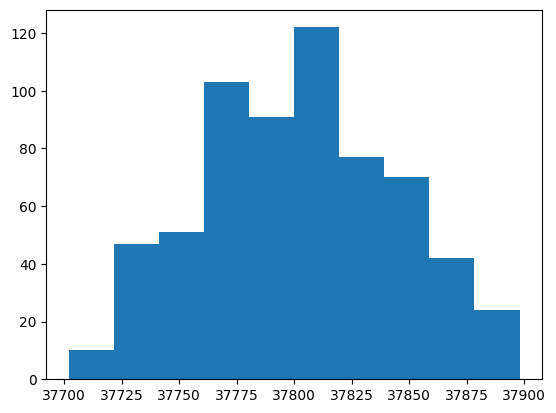

In [ ]:
plt.hist(df['detail_weight'])
plt.show()

In [ ]:
df['weight_kg'] = df['detail_weight'] / 1000

df.head()

,detail_weight,weight_kg
0,37873,37.873
1,37808,37.808
2,37773,37.773
3,37824,37.824
4,37834,37.834


In [ ]:
n_det = len(df)

print(n_det)

637


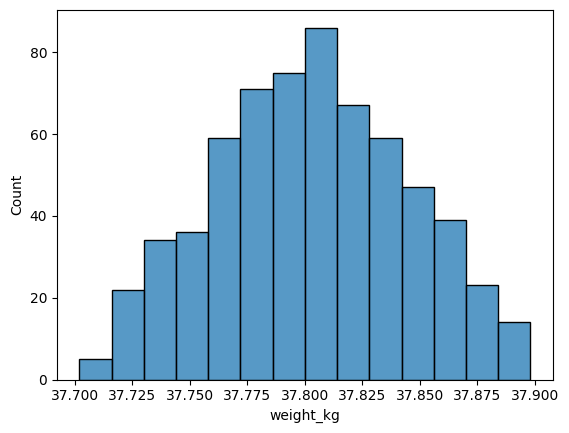

In [ ]:
sns.histplot(data = df['weight_kg'])
plt.show()

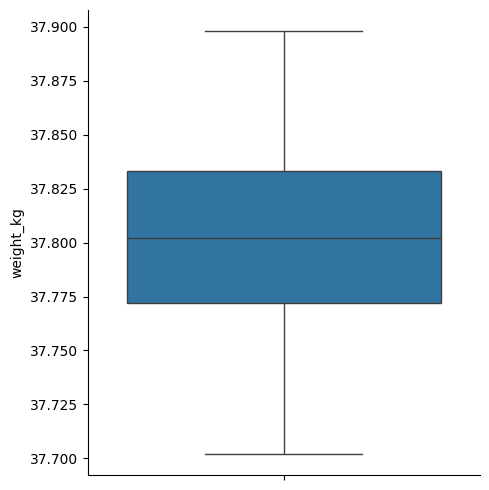

In [ ]:
sns.catplot(data = df['weight_kg'], kind = 'box')
plt.show()

In [ ]:
from scipy.stats import shapiro

s, p = shapiro(df['weight_kg'])
print(s)
print(p)

0.9909332394599915
0.0005954554653726518


In [ ]:
from scipy.stats import norm
dist = norm(loc=0, scale=1)

norm_025 = dist.ppf(.025)
norm_975 = dist.ppf(.975)
norm_05  = dist.ppf(.05)
norm_95  = dist.ppf(.95)

print(norm_025)
print(norm_975)
print(norm_05)
print(norm_95)

-1.9599639845400545
1.959963984540054
-1.6448536269514729
1.6448536269514722


In [ ]:
mean_weight = df['weight_kg'].mean()
print(mean_weight)
print(mean_weight - due_weight)

37.80223547880691
0.002235478806909441


Теперь рассчитаем дисперсию и стандартное отклонение:
1. Выборочное
2. Генеральной совокупности

In [ ]:
### Выборочное

print(df['weight_kg'].var())
print(df['weight_kg'].std())

0.0017551394310990024
0.04189438424298658


In [ ]:
### Генеральная совокупность

print(df['weight_kg'].var(ddof=0))
print(df['weight_kg'].std(ddof=0))

0.0017523841101710605
0.04186148719492728


In [ ]:
df['r'] = (df['weight_kg'] - mean_weight)**2

print("Дисперсия выборочной совокупности равна", df['r'].sum() / (n_det - 1))
print("Дисперсия генеральной совокупности равна", df['r'].sum() / n_det)
print()
print("Стандартное отклонение выборки равно", (df['r'].sum() / (n_det - 1))**.5)
print("Стандартное отклонение генеральной совокупности равно", (df['r'].sum() / n_det)**.5)

Дисперсия выборочной совокупности равна 0.0017551394310990024
Дисперсия генеральной совокупности равна 0.0017523841101710605

Стандартное отклонение выборки равно 0.04189438424298658
Стандартное отклонение генеральной совокупности равно 0.04186148719492728


In [ ]:
z_crit = (mean_weight - due_weight) / (df['weight_kg'].var() / n_det)**.5

print(z_crit)

1.3467421771241486


Создадим функцию, которая будет визуализировать статистический критерий в рамках нормального стандартного распределения.

In [ ]:
def draw_pvalue(val, two_side = 1):

  norm_rv = norm(loc=0, scale=1)

  x = np.linspace(-3,3,1000)
  y = norm_rv.pdf(x)

  norm_025 = dist.ppf(.025)
  norm_975 = dist.ppf(.975)
  norm_05  = dist.ppf(.05)
  norm_95  = dist.ppf(.95)

  plt.plot(x, y, label = "N(0,1)", color = 'black')   #### Контур нормального распределения
  plt.axvline(val, label = 'Значение критерия', color = 'purple') ### Полученный z-критерий
  plt.axvline(norm_025, label = 'Квантиль 2.5%', color = 'red', ls = '--') ### Левый квантиль
  plt.axvline(norm_975, label = 'Квантиль 97.5%', color = 'red', ls = '--') ### Левый квантиль
  plt.legend(loc = 'upper left')
  plt.title("Квантиль нормального стандартного распределения")

  #### Заполним зеленым цветом часть принятия гипотезы, а красным - зону отвержения
  x_accept = list(filter(lambda i: (i >= norm_025) & (i <= norm_975), x))
  x_naccept_left = list(filter(lambda i: i < norm_025, x))
  x_naccept_right = list(filter(lambda i: i > norm_975, x))
  y_accept = norm_rv.pdf(x_accept)
  y_naccept_left = norm_rv.pdf(x_naccept_left)
  y_naccept_right = norm_rv.pdf(x_naccept_right)

  plt.fill_between(x_accept, 0,y_accept, color = 'green', alpha = .5)
  plt.fill_between(x_naccept_left,0,y_naccept_left, color = 'red', alpha = .5)
  plt.fill_between(x_naccept_right,0,y_naccept_right, color = 'red', alpha = .5)

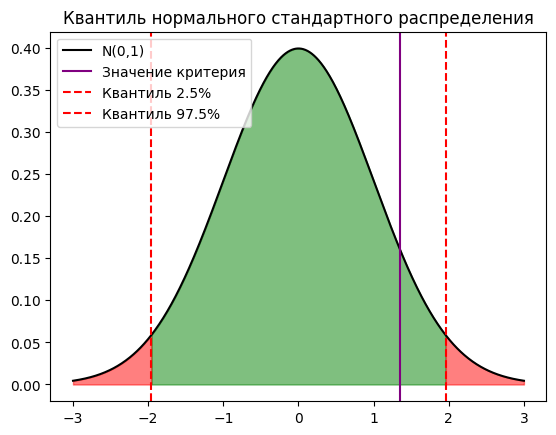

In [ ]:
draw_pvalue(z_crit)

In [ ]:
print(norm.cdf(z_crit, loc=0, scale=1))
print(norm.cdf(0, loc=0, scale=1))
print(norm.cdf(-z_crit, loc=0, scale=1))

0.9109683583364347
0.5
0.0890316416635652


In [ ]:
df.head()

,detail_weight,weight_kg,r
0,37873,37.873,0.005008
1,37808,37.808,0.000033
2,37773,37.773,0.000855
3,37824,37.824,0.000474
4,37834,37.834,0.001009


In [ ]:
data_add = [[df['detail_weight'].mean() + 500], [df['detail_weight'].mean() - 500], [df['detail_weight'].mean() + 700], [df['detail_weight'].mean() -700]]

# Create the pandas DataFrame
df_add = pd.DataFrame(data_add, columns=['detail_weight'])

df_add

,detail_weight
0,38302.235479
1,37302.235479
2,38502.235479
3,37102.235479


In [ ]:
df_new = pd.concat([df['detail_weight'], df_add['detail_weight']]).reset_index()

df_new['weight_kg'] = df_new['detail_weight'] / 1000
print(df_new['weight_kg'].mean())


37.80223547880691


In [ ]:
z_crit_new = (df_new['weight_kg'].mean() - due_weight) / (df_new['weight_kg'].var() / len(df_new))**.5

print(z_crit_new)

0.8886172543796095


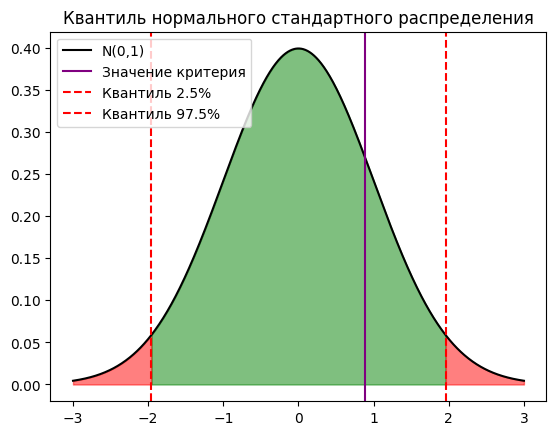

In [ ]:
draw_pvalue(z_crit_new)

## Задача 2. Сравнение кредитных выборок

Вам даны два ряда кредитов, которые были выданы двум разным сегментам пользователей. \
Необходимо выяснить, равны ли эти выборки с точки зрения среднего выданного кредита (на уровне значимости 5%).\
Нулевая гипотеза: средние кредиты в двух выборках равны.\
Альтернативная гипотеза: средние не равны.

In [ ]:
uploaded = files.upload()

Saving Credit_lists.csv to Credit_lists.csv


In [ ]:
dfb = pd.read_csv(io.BytesIO(uploaded['Credit_lists.csv']),  sep=';')

dfb.head()

,type,amt_credit
0,POS-2,150000
1,POS-2,50000
2,POS-2,75000
3,POS-1,25000
4,POS-1,50000


In [ ]:
pos1 = dfb[dfb['type']=='POS-1']['amt_credit']
pos2 = dfb[dfb['type']=='POS-2']['amt_credit']

print(len(pos1))
print(len(pos2))

833
668


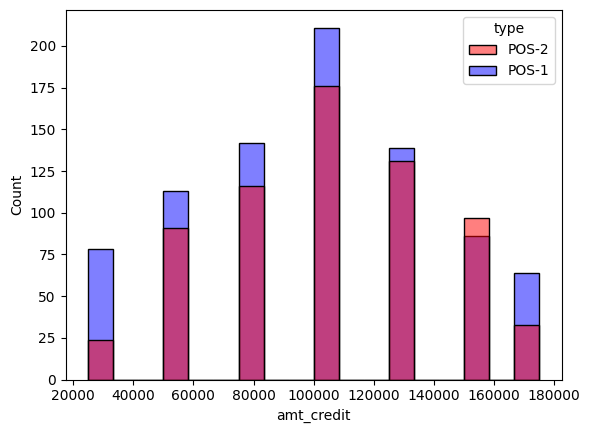

In [ ]:
sns.histplot(data = dfb, x = 'amt_credit', hue = 'type', palette=['red', 'blue'])
plt.show()

In [ ]:
s, p = shapiro(pos1)
print(s)
print(p)

0.947202205657959
1.1332988490863239e-16


In [ ]:
s, p = shapiro(pos2)
print(s)
print(p)

0.9497263431549072
2.6764807953489136e-14


In [ ]:
mean_pos1 = pos1.mean()
mean_pos2 = pos2.mean()

var_pos1 = pos1.var()
var_pos2 = pos2.var()

std_pos1 = pos1.std()
std_pos2 = pos2.std()

print(mean_pos1)
print(mean_pos2)
print()
print(var_pos1)
print(var_pos2)
print()
print(std_pos1)
print(std_pos2)

97028.81152460985
102020.95808383233

1760241957.359867
1412701209.2756016

41955.237543837924
37585.91769899468


-2.4278508672355095


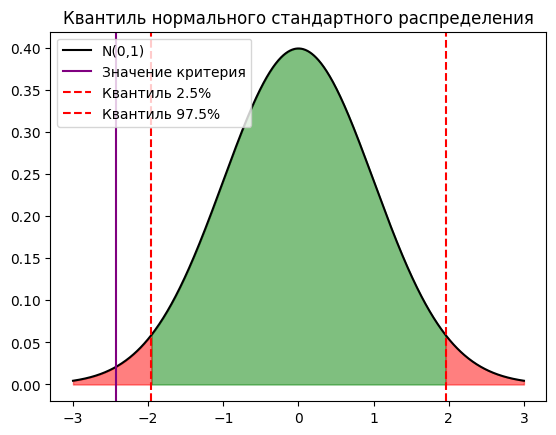

In [ ]:
z_crit = (mean_pos1 - mean_pos2)/(var_pos1 / len(pos1) + var_pos2 /len(pos2))**.5

print(z_crit)
draw_pvalue(z_crit)

In [ ]:
print(norm.cdf(z_crit, loc=0, scale=1) * 2)

0.015188587360395304


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
s, p = ttest_ind(pos1, pos2)

Чем больше наблюдений, тем слабее будут отличаться друг от друга Z- и t-критерии

In [ ]:
small_diffs = []

for _ in range(1000):
  pos1_small = np.random.choice(pos1 , 12)
  pos2_small = np.random.choice(pos2 , 12)

  z_crit = (pos1_small.mean() - pos2_small.mean()) / (pos1_small.var() / len(pos1_small) + pos2_small.var() / len(pos2_small))**.5
  t_crit, p_t = ttest_ind(pos1_small, pos2_small)

  small_diffs.append(z_crit - t_crit)

In [ ]:
big_diffs = []

for _ in range(1000):
  pos1_big = np.random.choice(pos1 , 1500)
  pos2_big = np.random.choice(pos2 , 1500)

  z_crit = (pos1_big.mean() - pos2_big.mean()) / (pos1_big.var() / len(pos1_big) + pos2_big.var() / len(pos2_big))**.5
  t_crit, p_t = ttest_ind(pos1_big, pos2_big)

  big_diffs.append(z_crit - t_crit)

In [ ]:
print(np.mean(small_diffs))
print(np.mean(big_diffs))

print(len(small_diffs))
print(len(big_diffs))

-0.013353665706044534
-0.0011463270977283343
1000
1000


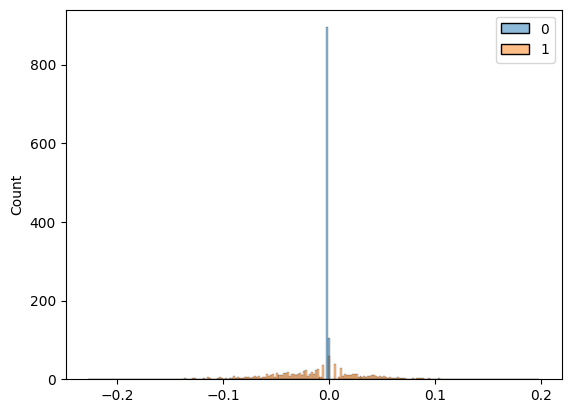

In [ ]:
sns.histplot(data=[big_diffs, small_diffs])
plt.show()

## Задача 3

Вы работаете аналитиком в агрегаторе доставки.\
Необходимо сравнить конверсии на сегментах "Shop" и "Restaurant", чтобы выявить "слабое звено".\
Также изучите результаты A/B теста, который был раскатан в агрегаторе доставки в течение марта.

In [ ]:
uploaded = files.upload()

Saving Delivery_Conv.csv to Delivery_Conv.csv


In [ ]:
dfd = pd.read_csv(io.BytesIO(uploaded['Delivery_Conv.csv']),  sep=';')

dfd.head()

,id_order,id_group,order_time,del_time,type
0,203041,0,2024/03/01 00:13:58,2024/03/01 02:51:25,Restaurant
1,203042,1,2024/03/01 00:33:56,2000/01/01 00:00:00,Restaurant
2,203043,1,2024/03/01 00:34:10,2024/03/01 01:47:45,Restaurant
3,203044,1,2024/03/01 00:36:51,2024/03/01 03:27:54,Restaurant
4,203045,1,2024/03/01 00:58:45,2024/03/01 04:02:12,Restaurant


In [ ]:
dfd['order_time'] = pd.to_datetime(dfd['order_time'], format = '%Y/%m/%d %H:%M:%S')
dfd['del_time']   = pd.to_datetime(dfd['del_time']  , format = '%Y/%m/%d %H:%M:%S')

dfd['flag_delivery'] = np.where(dfd['del_time']=='2000-01-01 00:00:00', 0, 1)

dfd.head()

,id_order,id_group,order_time,del_time,type,flag_delivery
0,203041,0,2024-03-01 00:13:58,2024-03-01 02:51:25,Restaurant,1
1,203042,1,2024-03-01 00:33:56,2000-01-01 00:00:00,Restaurant,0
2,203043,1,2024-03-01 00:34:10,2024-03-01 01:47:45,Restaurant,1
3,203044,1,2024-03-01 00:36:51,2024-03-01 03:27:54,Restaurant,1
4,203045,1,2024-03-01 00:58:45,2024-03-01 04:02:12,Restaurant,1


In [ ]:
dfd_rest = dfd[dfd['type']=='Restaurant']
dfd_shop = dfd[dfd['type']=='Shop']

print("Заказы из ресторанов проходили:")
print(dfd_rest['order_time'].min())
print(dfd_rest['order_time'].max())
print("В ресторанах было ", len(dfd_rest), " заказов")
print()
print("Заказы из магазинов проходили:")
print(dfd_shop['order_time'].min())
print(dfd_shop['order_time'].max())
print("В магазинах было ", len(dfd_shop), " заказов")

Заказы из ресторанов проходили:
2024-03-01 00:13:58
2024-03-24 23:58:08
В ресторанах было  2515  заказов

Заказы из магазинов проходили:
2024-03-01 01:03:42
2024-03-24 23:50:46
В магазинах было  569  заказов


In [ ]:
share_test = len(dfd[dfd['id_group']==1])/len(dfd)

print(share_test)

z_crit_prop = (share_test - .5)/(share_test*(1-share_test) / len(dfd))**.5

print(z_crit_prop)

z_crit_prop = (.4999 - .5)/(share_test*(1-share_test) / len(dfd))**.5

print(z_crit_prop)

0.4993514915693904
-0.07202830119149066
-0.011106764043726675


In [ ]:
print(dfd[dfd['type']=='Restaurant']['flag_delivery'].mean())
print(dfd[dfd['type']=='Shop']['flag_delivery'].mean())

s, p = ttest_ind(dfd[dfd['type']=='Restaurant']['flag_delivery'], dfd[dfd['type']=='Shop']['flag_delivery'])
print(s)
print(p)

0.6202783300198808
0.40597539543058
9.487991453622781
4.5531451908444165e-21


In [ ]:
print(dfd[dfd['id_group']==1]['flag_delivery'].mean())
print(dfd[dfd['id_group']==0]['flag_delivery'].mean())


s, p = ttest_ind(dfd[dfd['id_group']==1]['flag_delivery'], dfd[dfd['id_group']==0]['flag_delivery'])
print(s)
print(p)

0.5805194805194805
0.5809585492227979
-0.024699365398200317
0.9802963602643455


In [ ]:
print(dfd_rest[dfd_rest['id_group']==1]['flag_delivery'].mean())
print(dfd_rest[dfd_rest['id_group']==0]['flag_delivery'].mean())


s, p = ttest_ind(dfd_rest[dfd_rest['id_group']==1]['flag_delivery'], dfd_rest[dfd_rest['id_group']==0]['flag_delivery'])
print(s)
print(p)

0.6115506329113924
0.6290967226219025
-0.9063287666862481
0.36484875471782996


In [ ]:
print(dfd_shop[dfd_shop['id_group']==1]['flag_delivery'].mean())
print(dfd_shop[dfd_shop['id_group']==0]['flag_delivery'].mean())

print()


s, p = ttest_ind(dfd_shop[dfd_shop['id_group']==1]['flag_delivery'], dfd_shop[dfd_shop['id_group']==0]['flag_delivery'])
print(s)
print(p)

0.4384057971014493
0.37542662116040953

1.529348340855544
0.12673578606340233


In [ ]:
### А сколько же надо наблюдений?

p = dfd_shop[dfd_shop['id_group']==0]['flag_delivery'].mean()

print(16*p*(1-p)/(.08)**2)

586.2036832112196
